In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import poisson

In [155]:
# データの準備
data = pd.read_csv('data2.csv', header=None, sep=' ')
data = pd.Series(data.to_numpy().reshape(-1))
data.head(10)

0    2
1    2
2    4
3    6
4    4
5    5
6    2
7    3
8    1
9    2
dtype: int64

In [156]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

In [157]:
data.value_counts()

3    12
2    11
4    10
5     5
6     4
7     4
1     3
0     1
dtype: int64

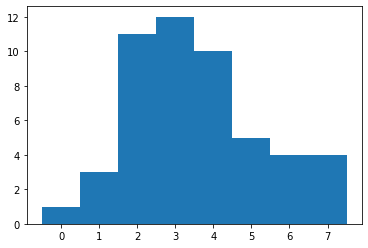

In [158]:
plt.hist(data, range=(0,7+1), bins=8, align='left')
plt.show()

In [159]:
data.var()

2.986122448979592

In [160]:
mu = data.mean()
counts = range(10)
prob = poisson.pmf(k=counts, mu=mu)
prob

array([0.02843882, 0.10124222, 0.18021114, 0.21385056, 0.190327  ,
       0.13551282, 0.08040427, 0.04089132, 0.01819664, 0.00719778])

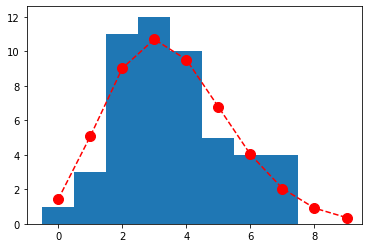

In [161]:
plt.plot(counts, prob*50, marker='o', color='r' ,linestyle='--', markersize=10)
plt.hist(data, range=(0,7+1), bins=8, align='left')
plt.show()

In [162]:
def calculate_logL(count_list, mu):
    L = 1
    for count in count_list:
        L *= poisson.pmf(k=count, mu=mu)
    return np.log(L)

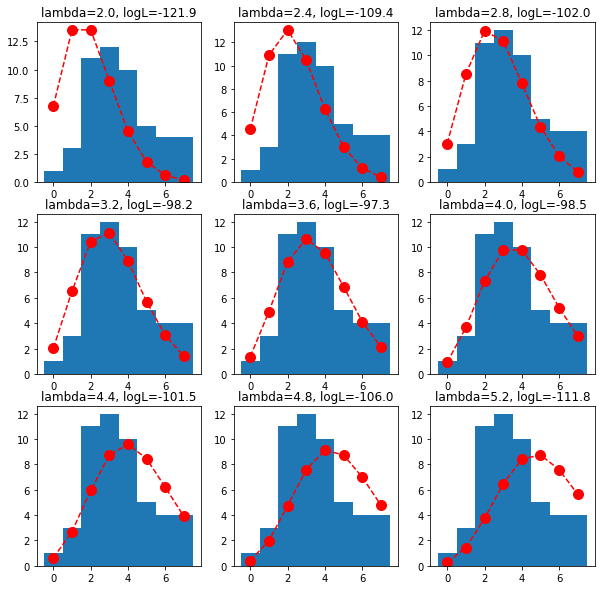

In [163]:
plt.figure(figsize=(10, 10))
mu = 2 - 0.4
for i in range(1,10):
    mu += 0.4
    logL = calculate_logL(list(data.to_numpy()), mu)
    prob = poisson.pmf(k=range(8), mu=mu)
    plt.subplot(3, 3, i)
    plt.hist(data, range=(0,7+1), bins=8, align='left')
    plt.plot(range(8), prob*50, marker='o', color='r' ,linestyle='--', markersize=10)
    plt.title('lambda={:.1f}, logL={:.1f}'.format(mu, logL))

Text(0, 0.5, 'logL')

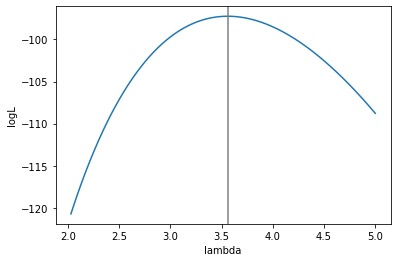

In [169]:
mu = 2.0
mu_list = []
logL_list = []
for _ in range(100):
    mu += 0.03
    logL = calculate_logL(list(data.to_numpy()), mu)
    mu_list.append(mu)
    logL_list.append(logL)
plt.plot(mu_list, logL_list)
plt.axvline(3.56, color='grey')
plt.xlabel('lambda')
plt.ylabel('logL')